In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [66]:
df = pd.read_csv("../datasets/Microsoft_Stock.csv", parse_dates=["Date"])
df = df.set_index("Date").to_period('D')


In [67]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322
2015-04-02,40.66,40.74,40.12,40.29,37487476
2015-04-06,40.34,41.78,40.18,41.55,39223692
2015-04-07,41.61,41.91,41.31,41.53,28809375
2015-04-08,41.48,41.69,41.04,41.42,24753438


In [68]:
remove_cols = ['Open','High','Low','Volume']
df.drop(columns=remove_cols,inplace=True)

In [69]:
df.head()

,Close
Date,
2015-04-01,40.72
2015-04-02,40.29
2015-04-06,41.55
2015-04-07,41.53
2015-04-08,41.42


In [70]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=df.index,
    constant=True,
    order=1,
    drop=True
)

X = dp.in_sample()
X.head()

,const,trend
Date,,
2015-04-01,1.0,1.0
2015-04-02,1.0,2.0
2015-04-06,1.0,3.0
2015-04-07,1.0,4.0
2015-04-08,1.0,5.0


In [71]:
from sklearn.linear_model import LinearRegression

y = df['Close']

model = LinearRegression(fit_intercept=False)
model.fit(X,y)

y_pred = pd.Series(model.predict(X),index=X.index)

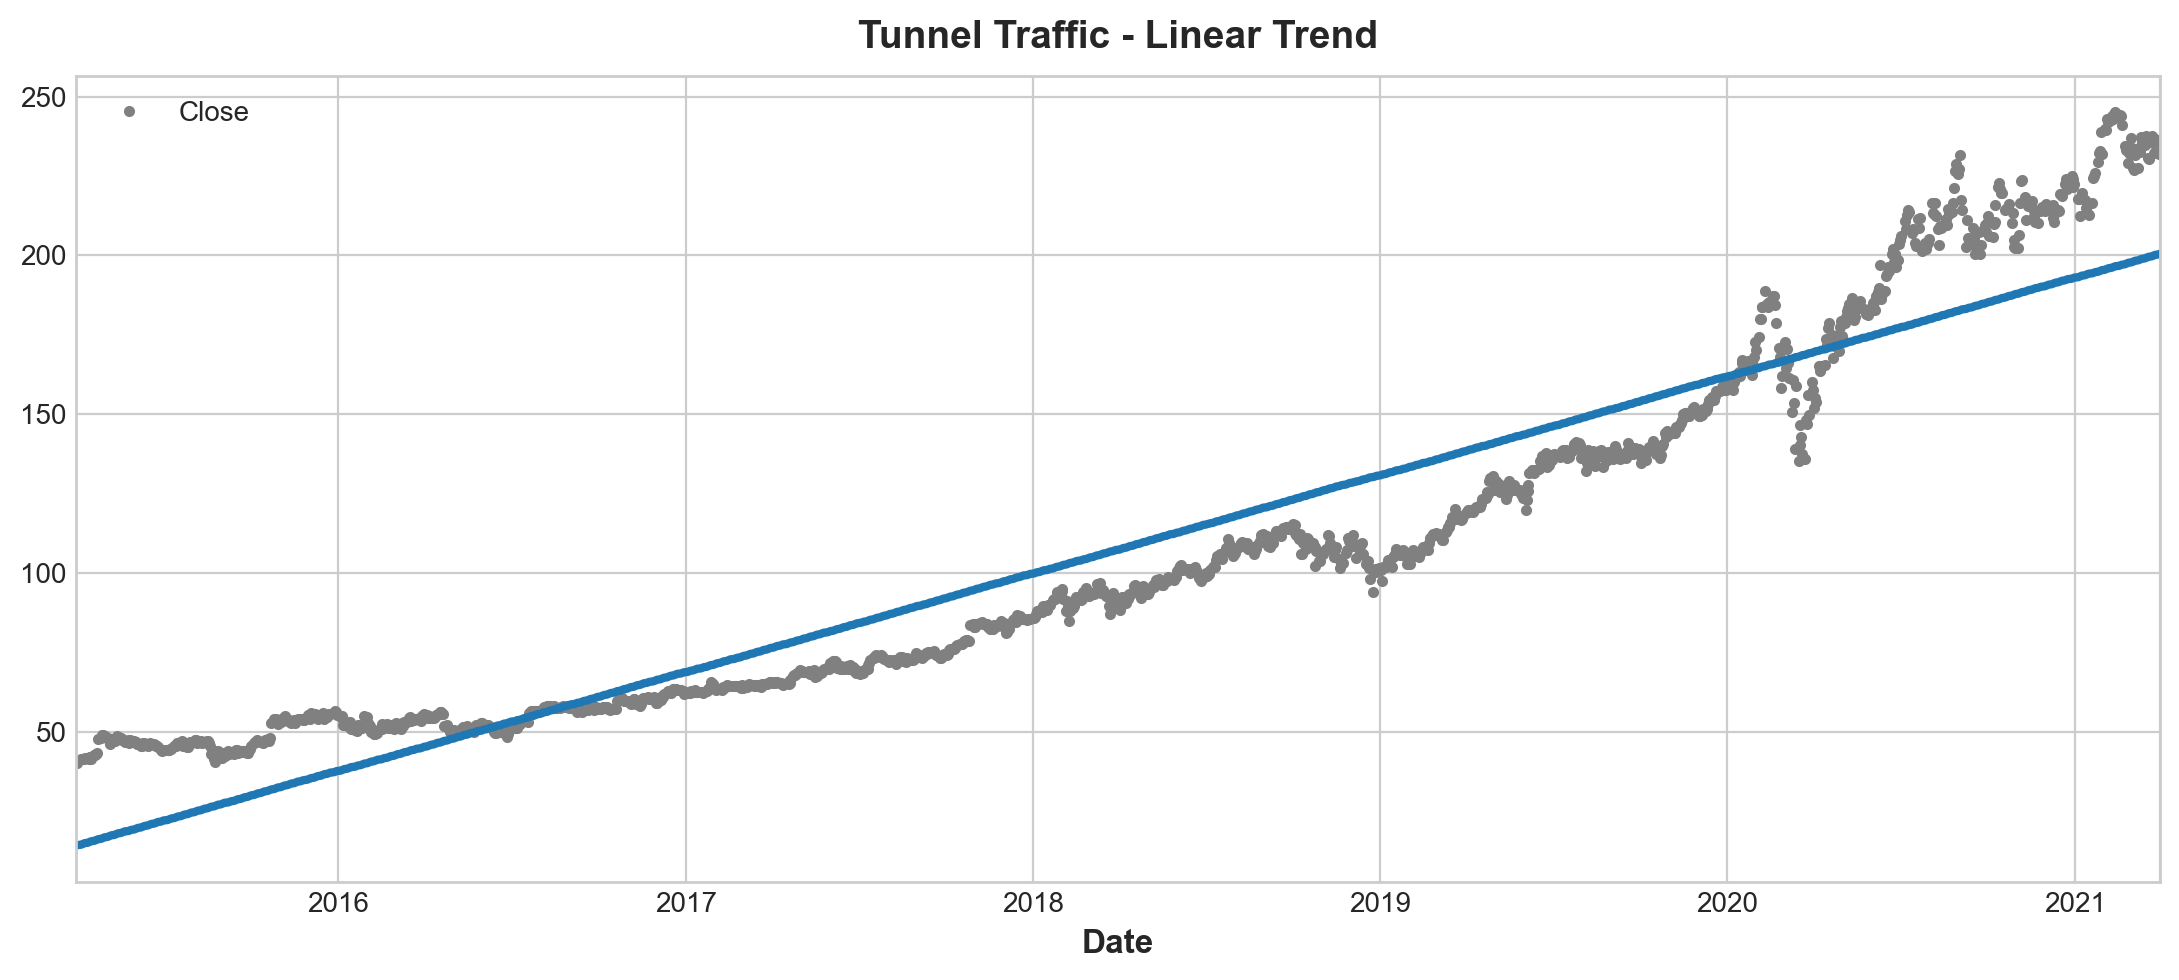

In [72]:
ax = df.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [73]:
X = dp.out_of_sample(steps=30)
y_fore = pd.Series(model.predict(X),index=X.index)
y_fore.head()

2021-04-01    200.661585
2021-04-02    200.784918
2021-04-03    200.908251
2021-04-04    201.031583
2021-04-05    201.154916
Freq: D, dtype: float64

/var/folders/5t/r1vdhdms7l3fhfv7vmzvscx80000gn/T/ipykernel_76055/938779963.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


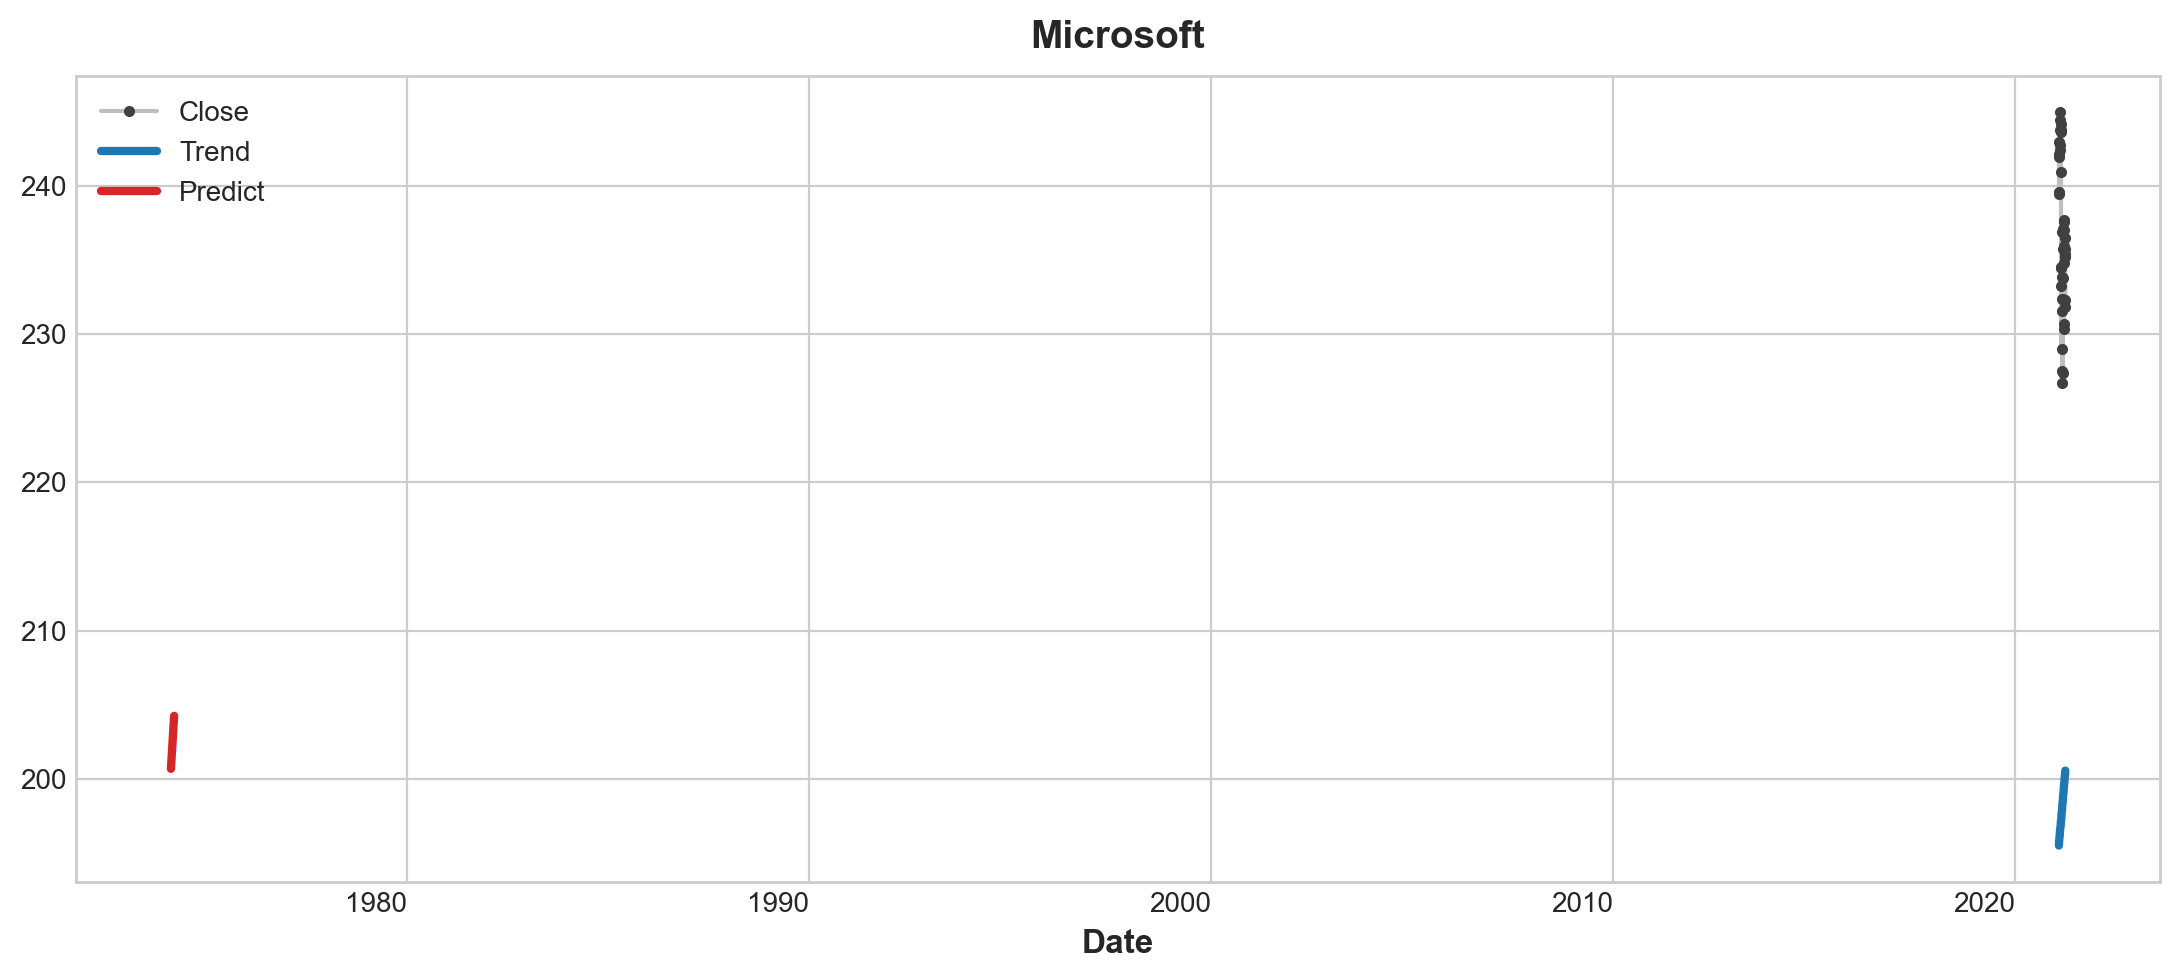

In [21]:
import matplotlib.pyplot as plt
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

ax = df["2021-02":].plot(title="Microsoft",**plot_params)
ax = y_pred["2021-02":].plot(ax=ax,linewidth=3,label="Trend")
ax = y_fore.plot(ax=ax,linewidth=3,label="Predict",color="C3")
_ = ax.legend()

In [36]:
df.head()

,Close
Date,
2015-04-01 16:00:00,40.72
2015-04-02 16:00:00,40.29
2015-04-06 16:00:00,41.55
2015-04-07 16:00:00,41.53
2015-04-08 16:00:00,41.42


In [37]:
df.tail()

,Close
Date,
2021-03-25 16:00:00,232.34
2021-03-26 16:00:00,236.48
2021-03-29 16:00:00,235.24
2021-03-30 16:00:00,231.85
2021-03-31 16:00:00,235.77


In [38]:
ax = df['2020':]

<AxesSubplot: title={'center': 'Tunnel'}, xlabel='Date'>

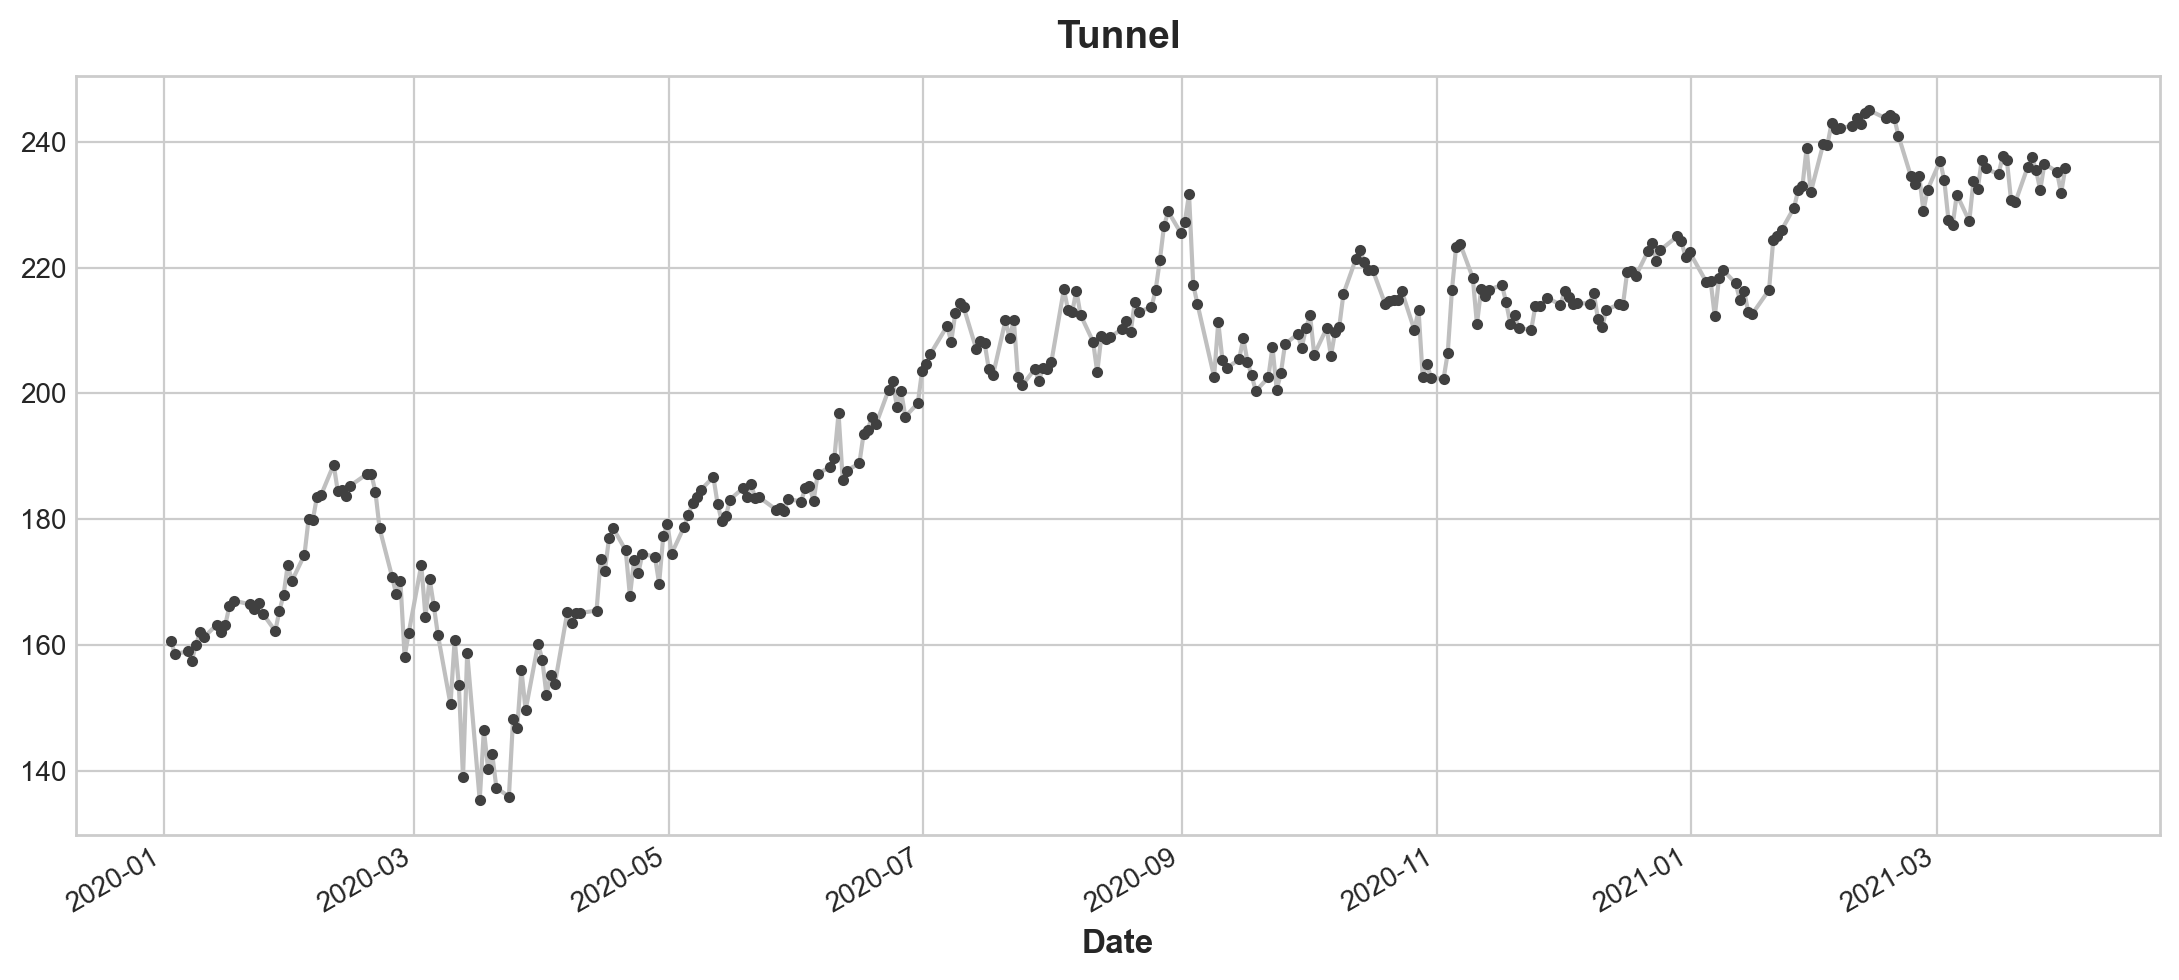

In [42]:
ax.plot(title='Tunnel',**plot_params)

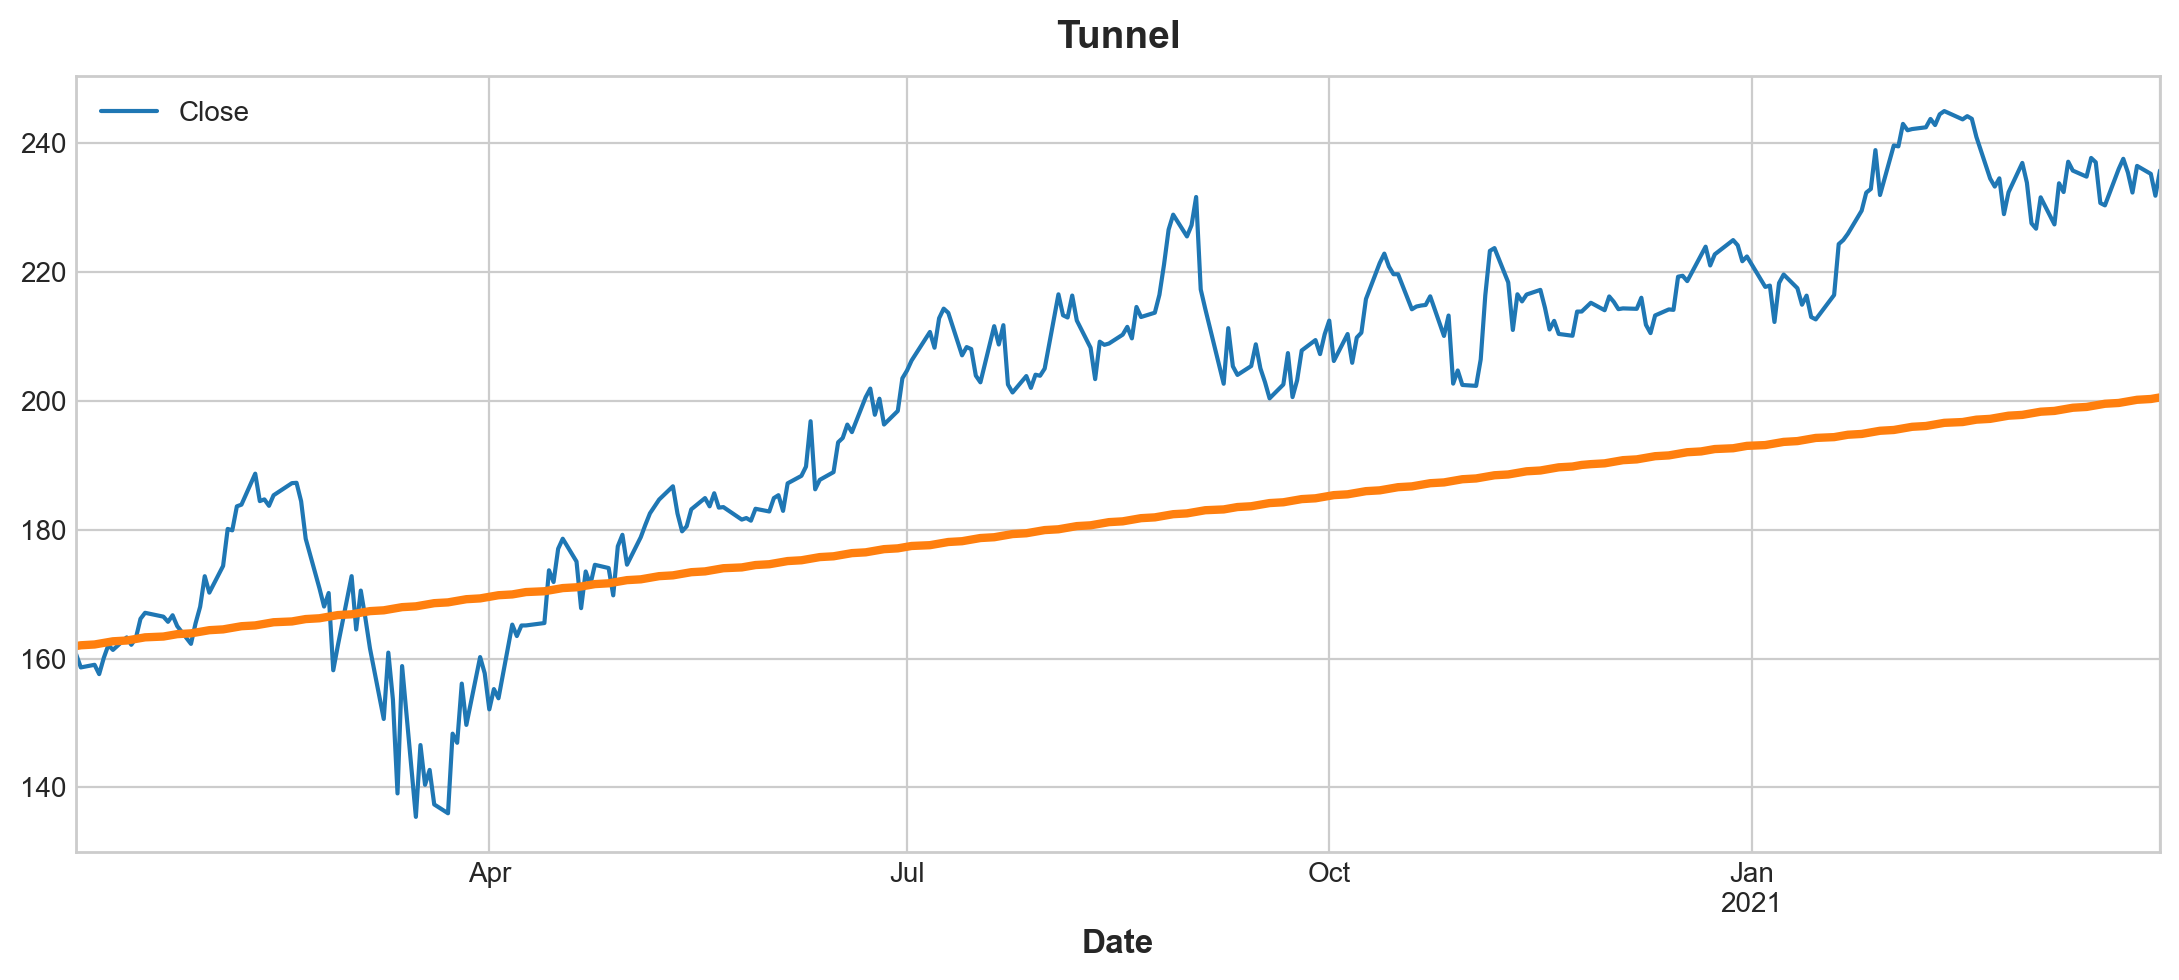

In [74]:
ax = df['2020':].plot(title='Tunnel')
ax = y_pred['2020':].plot(ax=ax,linewidth=3,label='Trend')
# ax = y_fore.plot(ax=ax,linewidth=3,label='Forecast',color="C3")

In [75]:
X = dp.out_of_sample(steps=30)

In [76]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X), index=X.index)

y_fore.head()

2021-04-01    200.661585
2021-04-02    200.784918
2021-04-03    200.908251
2021-04-04    201.031583
2021-04-05    201.154916
Freq: D, dtype: float64

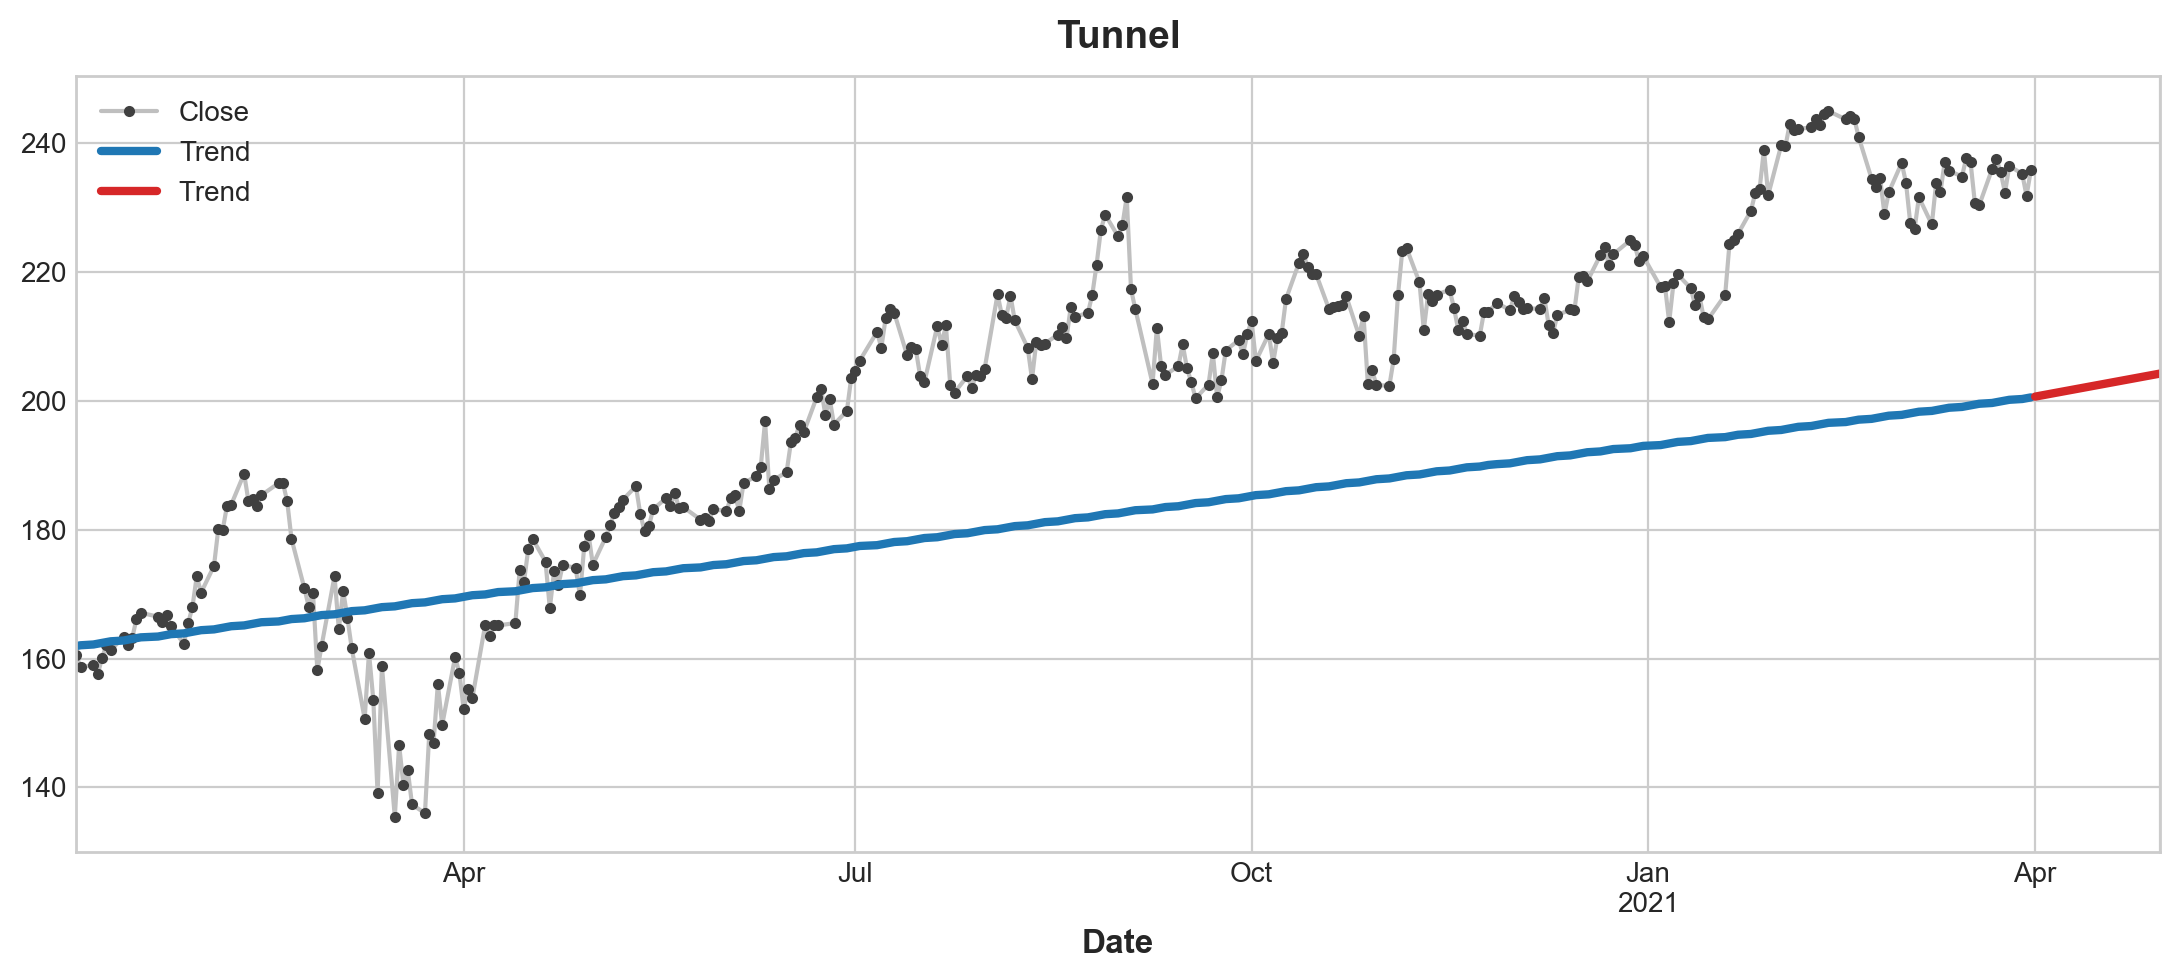

In [77]:
ax = df['2020':].plot(title='Tunnel',**plot_params)
ax = y_pred['2020':].plot(ax=ax,linewidth=3,label='Trend')
ax = y_fore.plot(ax=ax,linewidth=3,label='Trend ',color="C3")
_ = ax.legend()

In [78]:
#arima
from statsmodels.tsa.arima.model import ARIMA

In [84]:
p, d, q = 1, 1, 1  # Example parameters, adjust based on your data and analysis

# Create ARIMA model
model = ARIMA(df, order=(p, d, q))

# Fit the model
arima_model = model.fit()



In [85]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1511
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3381.104
Date:                Mon, 01 Jan 2024   AIC                           6768.207
Time:                        17:22:09   BIC                           6784.167
Sample:                    04-01-2015   HQIC                          6774.151
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2885      0.037     -7.781      0.000      -0.361      -0.216
ma.L1          0.0189      0.040      0.476      0.634      -0.059       0.097
sigma2         5.1570      0.075     68.924      0.0

In [91]:
  # Example prediction for 10 steps ahead
predictions = arima_model.predict(start='2020', end='2021-03-31', typ='levels')

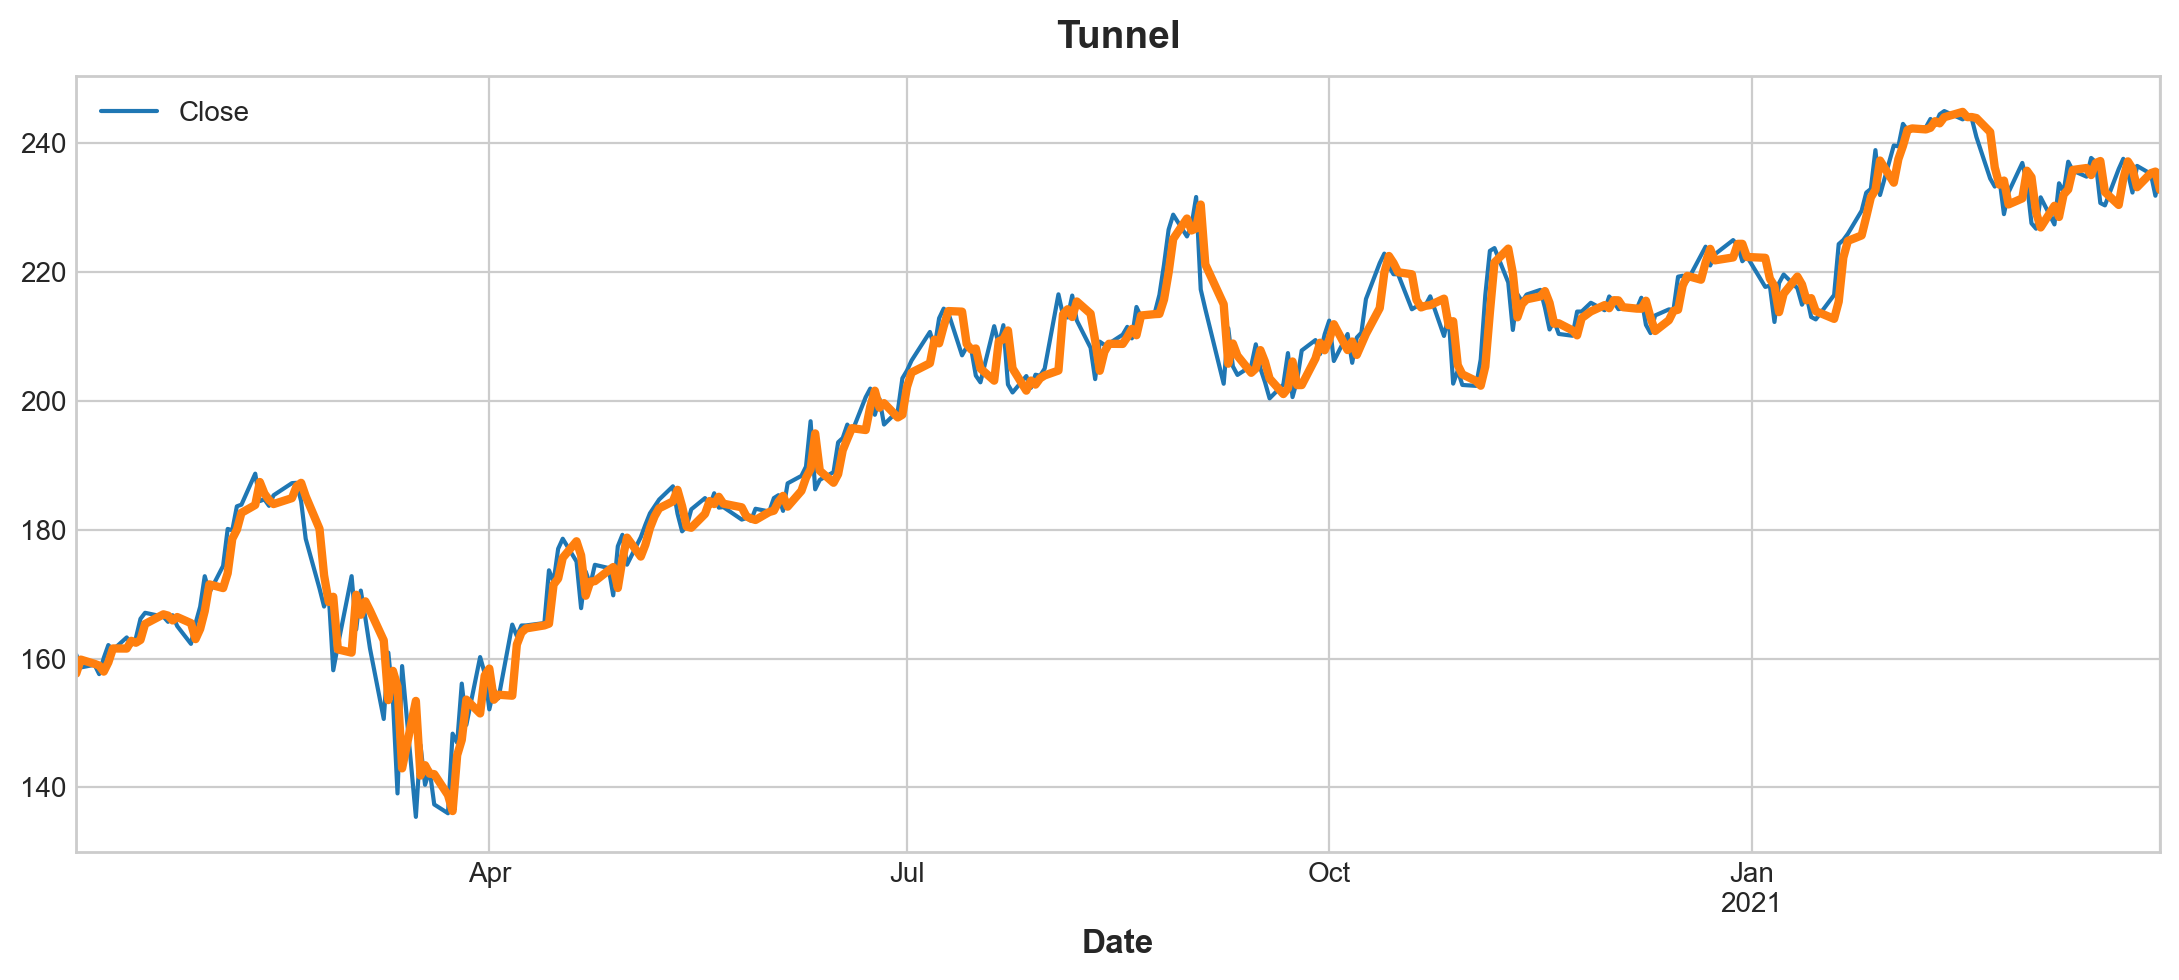

In [93]:
ax = df['2020':].plot(title='Tunnel')
ax = predictions['2020':].plot(ax=ax,linewidth=3,label='Trend')
# ax = y_fore.plot(ax=ax,linewidth=3,label='Forecast',color="C3")

In [96]:
X.tail()

,const,trend
2021-04-26,1.0,1537.0
2021-04-27,1.0,1538.0
2021-04-28,1.0,1539.0
2021-04-29,1.0,1540.0
2021-04-30,1.0,1541.0


In [97]:
X = dp.out_of_sample(steps=30)

y_fore = pd.Series(arima_model.predict(start='2021-04-01',end='2021-04-30'), index=X.index)

y_fore.head()

2021-04-01    234.936363
2021-04-02    234.936363
2021-04-03    234.936363
2021-04-04    234.936363
2021-04-05    234.936363
Freq: D, Name: predicted_mean, dtype: float64

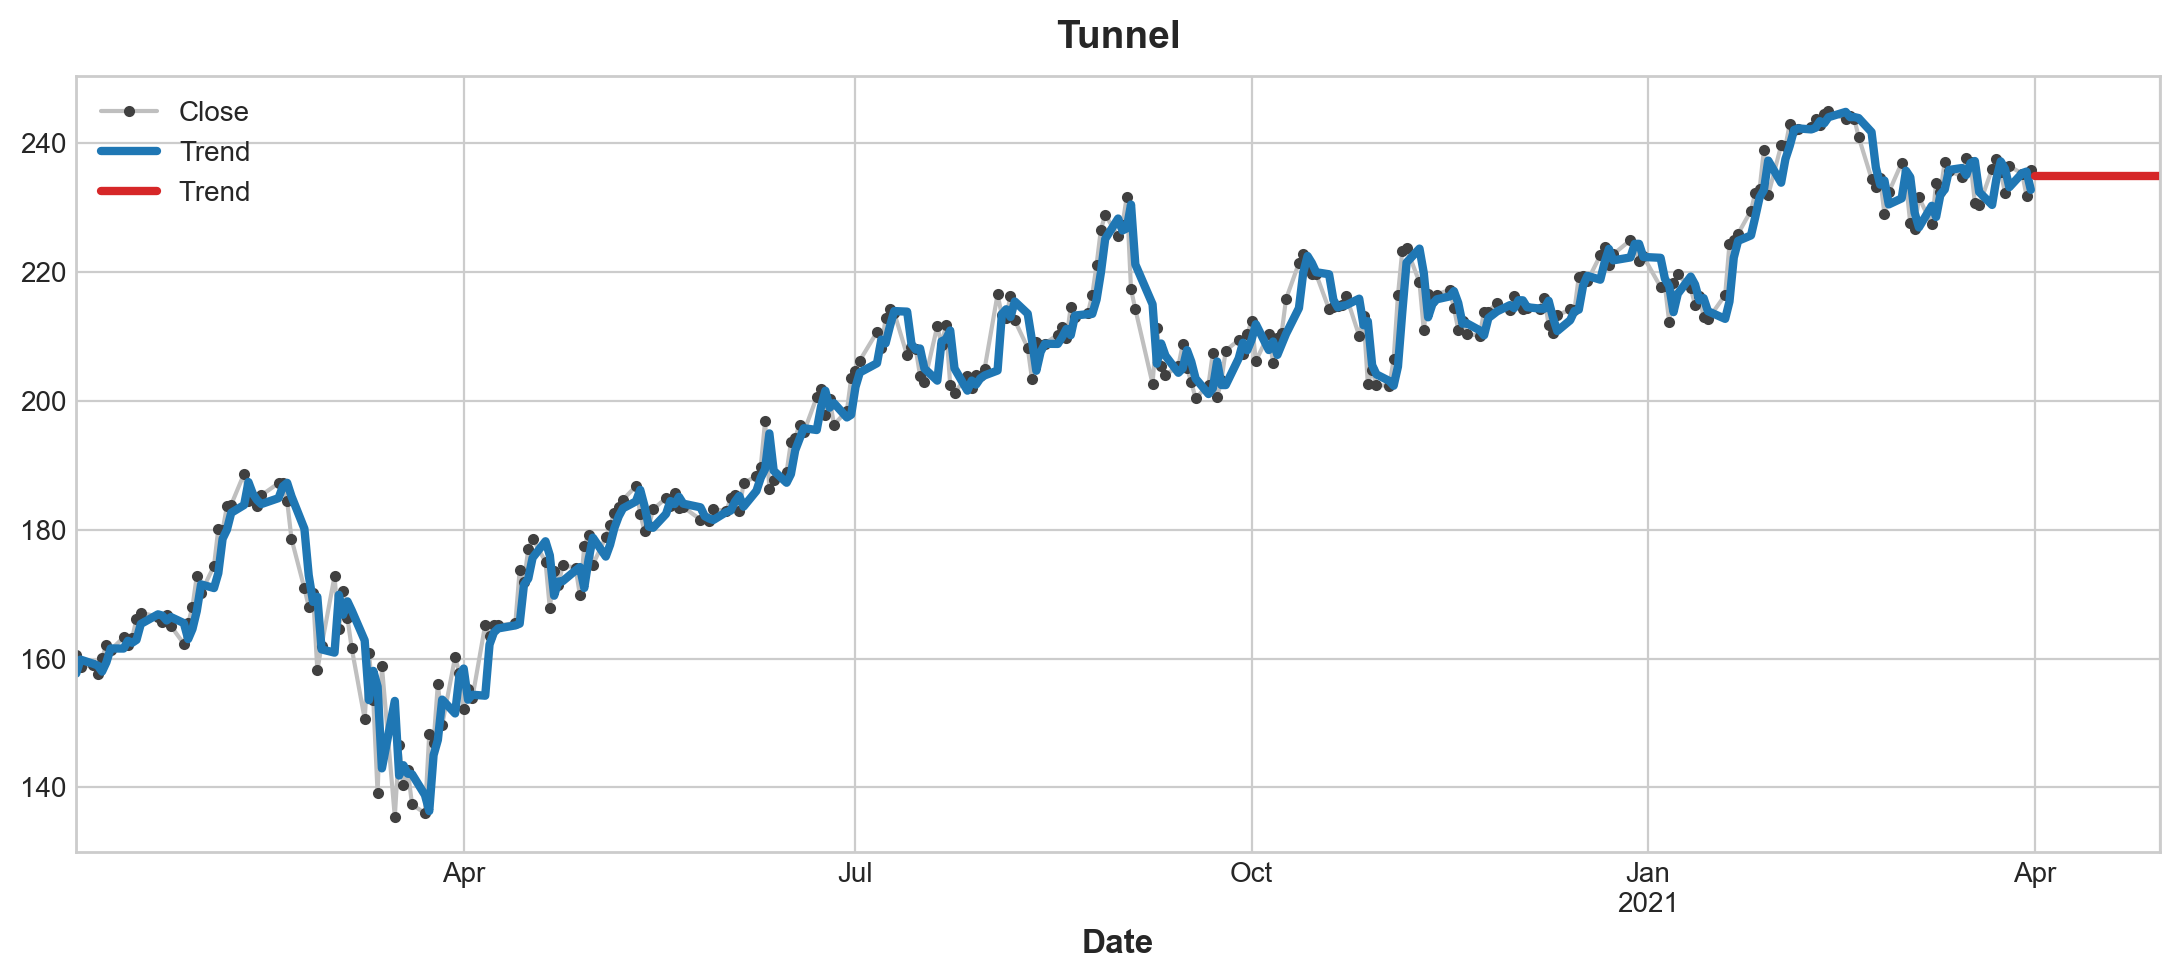

In [98]:
ax = df['2020':].plot(title='Tunnel',**plot_params)
ax = predictions['2020':].plot(ax=ax,linewidth=3,label='Trend')
ax = y_fore.plot(ax=ax,linewidth=3,label='Trend ',color="C3")
_ = ax.legend()

In [99]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [118]:
svr_model = SVR(kernel='rbf',C=1)


In [124]:
X_train = df.index

In [126]:
X_train = X_train.to_numpy()

In [128]:
X_train

array([Period('2015-04-01', 'D'), Period('2015-04-02', 'D'),
       Period('2015-04-06', 'D'), ..., Period('2021-03-29', 'D'),
       Period('2021-03-30', 'D'), Period('2021-03-31', 'D')], dtype=object)

In [131]:
from arch import arch_model

In [133]:
garch_model = arch_model(df,vol='GARCH',p=1,q=1)

results = garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 44620.25784594283
Iteration:      2,   Func. Count:     12,   Neg. LLF: 11650.959486658903
Iteration:      3,   Func. Count:     19,   Neg. LLF: 7522.311906203148
Iteration:      4,   Func. Count:     25,   Neg. LLF: 7366.781358561631
Iteration:      5,   Func. Count:     31,   Neg. LLF: 7230.95952233981
Iteration:      6,   Func. Count:     36,   Neg. LLF: 7183.274246953257
Iteration:      7,   Func. Count:     41,   Neg. LLF: 7230.025914875126
Iteration:      8,   Func. Count:     55,   Neg. LLF: 7169.044059522537
Iteration:      9,   Func. Count:     62,   Neg. LLF: 7049.193297263428
Iteration:     10,   Func. Count:     67,   Neg. LLF: 7048.171343878563
Iteration:     11,   Func. Count:     72,   Neg. LLF: 7044.6066929888
Iteration:     12,   Func. Count:     77,   Neg. LLF: 7044.128430222648
Iteration:     13,   Func. Count:     82,   Neg. LLF: 7043.911772571972
Iteration:     14,   Func. Count:     87,   Neg. LLF: 7043.7085887

In [141]:
y_pred = pd.Series(garch_model.predict(df['Close']),index=X.index)
ax = df['2020':].plot(title='Tunnel')
ax = y_pred['2020':].plot(ax=ax,linewidth=3,label='Trend')
# ax = y_fore.plot(ax=ax,linewidth=3,label='Forecast',color="C3")

AttributeError: 'ConstantMean' object has no attribute 'predict'

AttributeError: 'ConstantMean' object has no attribute 'predict'